In [15]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [16]:
# Step 1: Build the time_data dictionary from the logs
logs_base_dir = './logs'
output_dir = "out"
os.makedirs(output_dir, exist_ok=True)
time_data = defaultdict(list)

In [17]:
# Regex pattern to capture time names and values, excluding "[Background] -"
pattern = re.compile(r"- \[Background\] - (.+?): (\d+(?:\.\d+)?) ms")

In [18]:
for sub1 in os.listdir(logs_base_dir):
    sub1_path = os.path.join(logs_base_dir, sub1)
    logs_path = os.path.join(sub1_path, "logs")
    if os.path.exists(logs_path) and os.path.isdir(logs_path):
        for item in os.listdir(logs_path):
            item_path = os.path.join(logs_path, item)
            if os.path.isfile(item_path):
                with open(item_path, 'r', encoding='utf-8') as file:
                    for line in file:
                        match = pattern.search(line)
                        if match:
                            time_name, time_value = match.groups()
                            time_data[time_name.strip()].append(float(time_value))

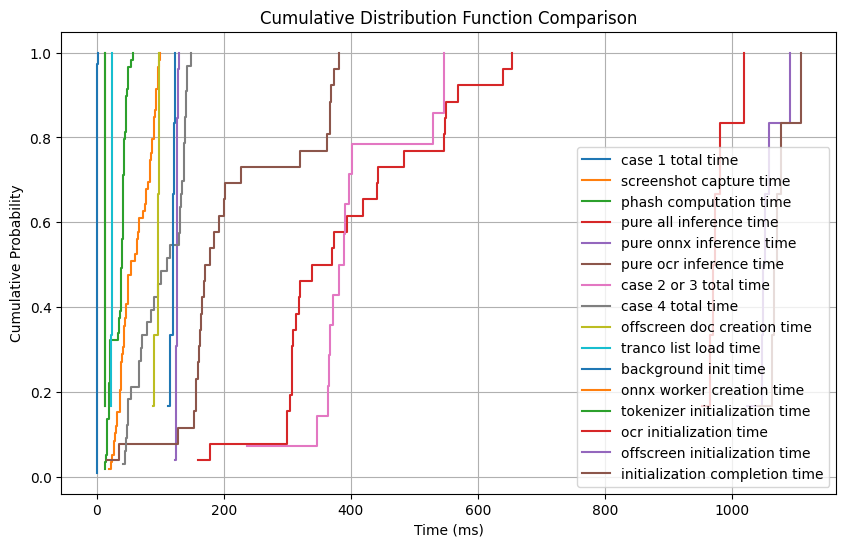

In [21]:
# ### Single Plot for All

# Step 2: Plot the CDF for each key on the same graph
plt.figure(figsize=(10, 6))

for key, values in time_data.items():
    values = np.array(values)
    sorted_values = np.sort(values)
    # Compute the CDF: each value's rank divided by total number of points
    cdf = np.arange(1, len(sorted_values) + 1) / len(sorted_values)
    plt.step(sorted_values, cdf, where="post", label=key)

plt.xlabel('Time (ms)')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function Comparison')
plt.grid(True)
plt.legend()
plt.show()

In [20]:
for key, values in time_data.items():
    values = np.array(values)
    sorted_values = np.sort(values)
    # Compute the CDF: each value's rank divided by total number of points
    cdf = np.arange(1, len(sorted_values) + 1) / len(sorted_values)

    plt.figure(figsize=(8, 6))
    # Use a step plot for a typical CDF appearance
    plt.step(sorted_values, cdf, where="post", label=key)
    plt.xlabel('Time (ms)')
    plt.ylabel('Cumulative Probability')
    plt.title(f'CDF for {key}')
    plt.grid(True)
    plt.legend()

    # Save the figure as a PNG file
    filename = f"{output_dir}/{key.replace(' ', '_')}.png"
    plt.savefig(filename)
    plt.close()  # Close the figure to free memory

    print(f"Saved CDF plot for {key} to {filename}")

Saved CDF plot for case 1 total time to out/case_1_total_time.png
Saved CDF plot for screenshot capture time to out/screenshot_capture_time.png
Saved CDF plot for phash computation time to out/phash_computation_time.png
Saved CDF plot for pure all inference time to out/pure_all_inference_time.png
Saved CDF plot for pure onnx inference time to out/pure_onnx_inference_time.png
Saved CDF plot for pure ocr inference time to out/pure_ocr_inference_time.png
Saved CDF plot for case 2 or 3 total time to out/case_2_or_3_total_time.png
Saved CDF plot for case 4 total time to out/case_4_total_time.png
Saved CDF plot for offscreen doc creation time to out/offscreen_doc_creation_time.png
Saved CDF plot for tranco list load time to out/tranco_list_load_time.png
Saved CDF plot for background init time to out/background_init_time.png
Saved CDF plot for onnx worker creation time to out/onnx_worker_creation_time.png
Saved CDF plot for tokenizer initialization time to out/tokenizer_initialization_time.pn